In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [118]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [119]:
df = df.iloc[:,2:]

In [120]:
df.sample()

,Age,EstimatedSalary,Purchased
64,59,83000,0


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1), df['Purchased'], test_size= 0.3, random_state=0)

In [123]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [127]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [128]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [129]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [130]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [131]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


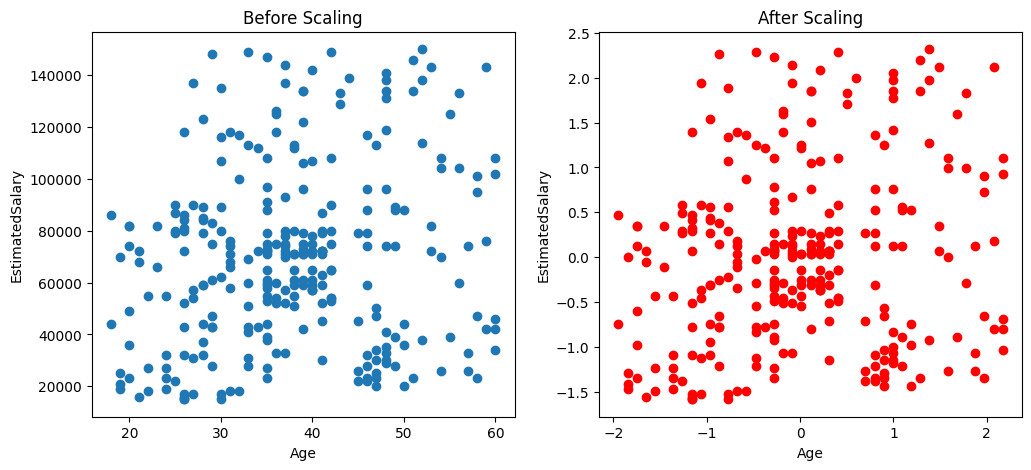

In [132]:
fig , (ax1 ,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_xlabel('Age')
ax2.set_ylabel('EstimatedSalary')
ax2.set_title('After Scaling')

plt.show()

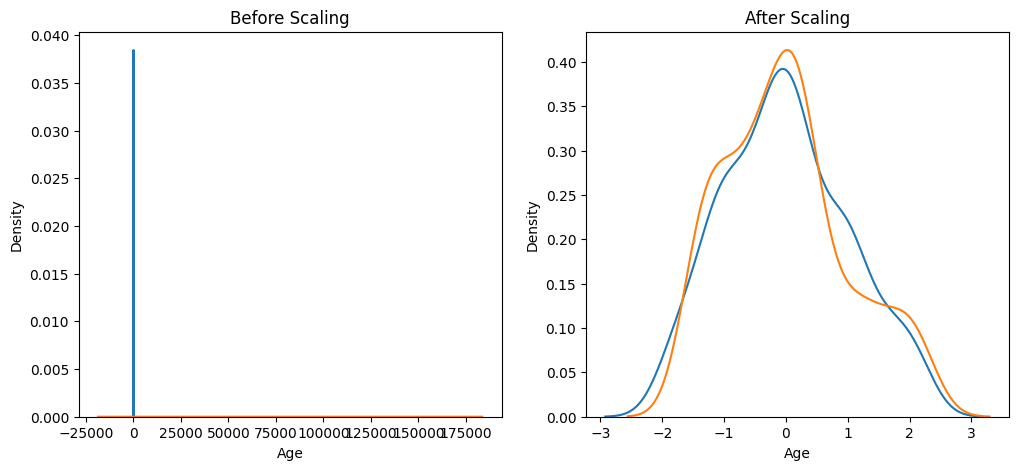

In [133]:
fig , (ax1 ,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr = LogisticRegression()

In [136]:
lr_scaled = LogisticRegression()

In [137]:
lr.fit(X_train, y_train)

LogisticRegression()

In [138]:
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [139]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [141]:
print("actual Accuracy Score", accuracy_score(y_test, y_pred))
print("Confusion Matrix", confusion_matrix(y_test, y_pred))
print("Classification Report", classification_report(y_test, y_pred))

print("Scaled Accuracy Score", accuracy_score(y_test, y_pred_scaled))
print("Scaled Confusion Matrix", confusion_matrix(y_test, y_pred_scaled))
print("Scaled Classification Report", classification_report(y_test, y_pred_scaled))


actual Accuracy Score 0.875
Confusion Matrix [[74  5]
 [10 31]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.94      0.91        79
           1       0.86      0.76      0.81        41

    accuracy                           0.88       120
   macro avg       0.87      0.85      0.86       120
weighted avg       0.87      0.88      0.87       120

Scaled Accuracy Score 0.8666666666666667
Scaled Confusion Matrix [[74  5]
 [11 30]]
Scaled Classification Report               precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.86      0.73      0.79        41

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.85       120
weighted avg       0.87      0.87      0.86       120

